# **K-Means Clustering Algorithm Task**
You have to apply k means clustering algorithm on the provided dataset. The output should have a cluster column at the last.                                                                                      


## **Part 1:**                                                             
You have to write algorithm of k-means clustering using only NumPy and pandas. You are not allowed to use any library for Part 1.

In [91]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [92]:
# Load dataset
def load_dataset():
    df = pd.read_csv("salary_data.csv")
    return df

# Preprocess dataset: handle categorical variables and normalization
def preprocess_data(df):
    # TODO: Convert categorical features to numeric using one-hot or label encoding
    # TOFO: Apply scaling where needed
    # TODO: Drop irrelevant columns if needed

    

    # Encode categorical variables
    label_encoders = {}
    for col in ['Education', 'WorkType', 'Gender']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Scale numerical values
    scaler = StandardScaler()
    features_to_scale = ['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression', 'Salary']
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    
    return df

In [93]:
def kmeans_scratch(X, k, max_iters=100):


  # Return:
  # - labels: 1D numpy array of cluster assignments
  # - centroids: final centroid coordinates
    np.random.seed(909)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

In [94]:
k = 4
max_iter = 200

df = load_dataset()
df_processed = preprocess_data(df)

X = df_processed.values  # 🔧 this line fixes the KeyError
labels, centroids = kmeans_scratch(X, k, max_iter)

df['Cluster'] = labels
print(df.head())


        Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  \
0 -0.652693     -0.606337 -1.409589            -1.302409          1         0   
1 -1.565871      2.783826 -0.020074            -0.212299          2         0   
2 -0.348301     -0.323198 -1.505977            -1.302409          3         0   
3 -1.489773     -0.871276  0.369671             1.150339          3         0   
4 -1.261478     -0.310324  0.504171            -1.302409          2         0   

   Gender    Salary  Cluster  
0       1  0.591112        3  
1       0 -0.170847        3  
2       1  0.358686        3  
3       0 -0.889520        1  
4       1 -1.394736        3  


In [95]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## **Part 2:**

Implement this task using the libraries. Explore Libraries of K-mean clustering algorithm.

In [96]:
from sklearn.cluster import KMeans

In [97]:

# Load and preprocess the data
df = load_dataset()
df_processed = preprocess_data(df)

# Convert to NumPy array for KMeans
X = df_processed.values

# Set parameters
k = 4
max_iter = 200

# Apply KMeans from sklearn
kmeans = KMeans(n_clusters=k, max_iter=max_iter, n_init='auto', random_state=42)
labels = kmeans.fit_predict(X)


In [98]:
# Add cluster labels to the original dataframe
df['Cluster'] = labels

# View the result
print(df.head())

        Age  SiteSpending  SiteTime  RecommendImpression  Education  WorkType  \
0 -0.652693     -0.606337 -1.409589            -1.302409          1         0   
1 -1.565871      2.783826 -0.020074            -0.212299          2         0   
2 -0.348301     -0.323198 -1.505977            -1.302409          3         0   
3 -1.489773     -0.871276  0.369671             1.150339          3         0   
4 -1.261478     -0.310324  0.504171            -1.302409          2         0   

   Gender    Salary  Cluster  
0       1  0.591112        2  
1       0 -0.170847        2  
2       1  0.358686        2  
3       0 -0.889520        1  
4       1 -1.394736        2  


## **Part 3:** (Visualize for both part 1 and part 2)
Visualize the clusters using PCA (2D)

In [99]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [100]:
def visualize_clusters(X, labels, title):
# TODO:
# 1. Apply PCA to reduce features to 2 dimensions
# 2. Create a scatter plot (use Cluster as color)
# 3. Add axis labels and title

    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.show()

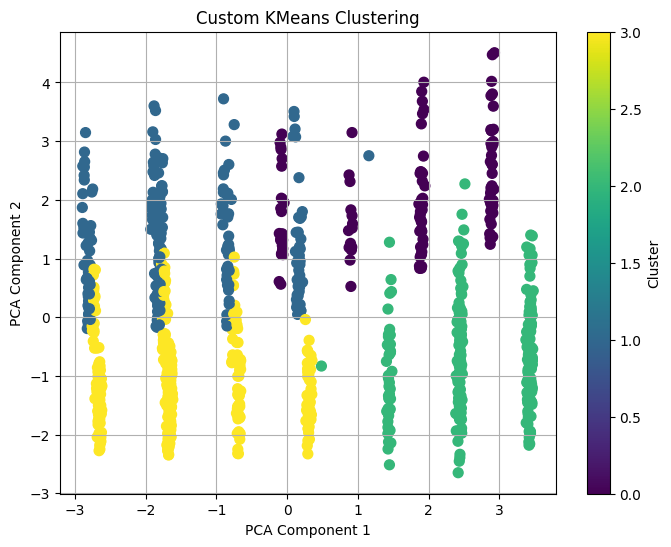

In [101]:
# Call this after scaling and predicting in Part 2
# visualize_clusters(scaled_data, labels, "K-Means Clustering Visualization")
X = df_processed.values
labels_custom, centroids_custom = kmeans_scratch(X, k, max_iter)
visualize_clusters(X, labels_custom, "Custom KMeans Clustering")




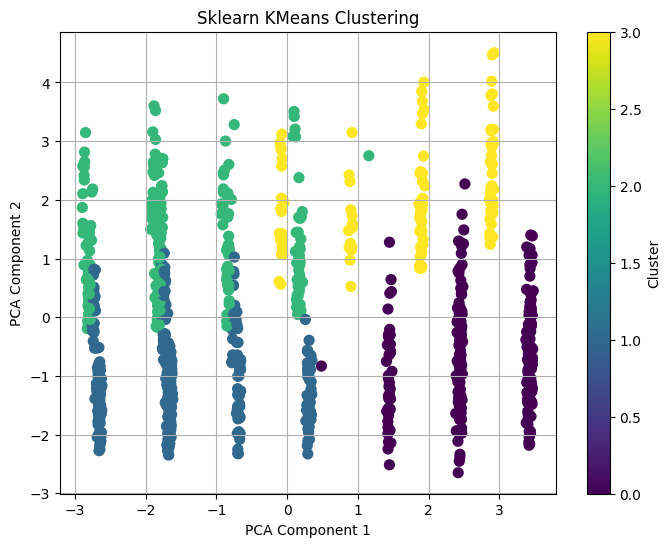

In [102]:
kmeans = KMeans(n_clusters=k, max_iter=max_iter, n_init=10, random_state=42)
labels_sklearn = kmeans.fit_predict(X)
visualize_clusters(X, labels_sklearn, "Sklearn KMeans Clustering")
